## Iris Clustering

In [0]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data=load_iris()

In [0]:
samples=data.data # only features, no target values

In [0]:
model=KMeans(n_clusters=3)

In [32]:
model.fit(samples)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
results=model.predict(samples)

In [34]:
results

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [0]:
datadict={}
for i in range(len(data.feature_names)):
  datadict[data.feature_names[i]]=samples[:,i]
datadict['cluster']=results

In [36]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

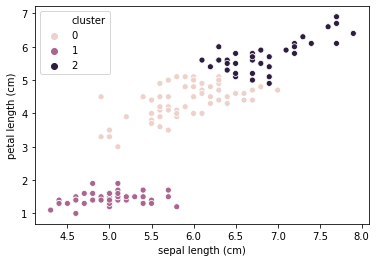

In [49]:
import numpy as np
import seaborn as sns
df=pd.DataFrame(datadict)
sns.scatterplot(x='sepal length (cm)',y='petal length (cm)',data=df,hue='cluster')

In [0]:
centroids=model.cluster_centers_

In [50]:
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

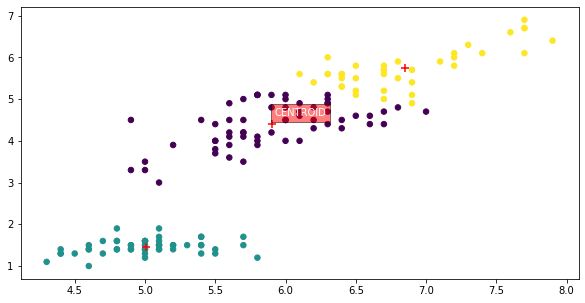

In [87]:
centroids_x=centroids[:,0]
centroids_y=centroids[:,2]
plt.figure(figsize=(10,5))
plt.scatter(df['sepal length (cm)'],df['petal length (cm)'],c=df['cluster'],s=30)
plt.scatter(centroids_x,centroids_y,color='red',marker='+',s=50)
plt.text(centroids_x[0]+0.02,centroids_y[0]+0.2,'CENTROID',c='white',bbox=dict(facecolor='red',alpha=0.5))
plt.show()

## Evaluating Clusters

* A cross tabulation helps us understand how good the cluster are based on some pre defined labels.
* `Note: This is only possible for labelled datasets.`

In [0]:
df['species']=data.target

In [0]:
ct=pd.crosstab(df.cluster,df.species)

In [92]:
ct

species,0,1,2
cluster,,,
0,0,48,14
1,50,0,0
2,0,2,36


* When the dataset is unlabelled, we use `inertia` as the metric.
* `Inertia is a meausure of the distance of each point in a cluster from its centroid.`
* K-Means algorithm aims to minimize inertia,

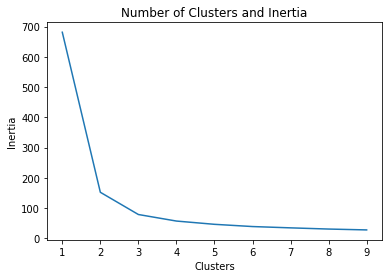

In [103]:
n_clusters=range(1,10)
inertia=[]
for n in n_clusters:
  model=KMeans(n_clusters=n).fit(samples)
  inertia.append(model.inertia_)
plt.title('Number of Clusters and Inertia')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.plot(n_clusters,inertia)

## Feature Transformation for Clustering

In [104]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,species
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit_transform(df[[col for col in df.columns[:4]]])

* KMeans clustering algorithm is strongly influenced by the variance of features.
* Disproportionate variances amongst a sample's features can lead to poor cluster formation.